In [ ]:
## Imports and loading DFs

import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


BASE_DIR = Path(r"C:/Users/prida/Desktop/ST238 Project")  # paste dir to folder w/ datasets here

patients_path = BASE_DIR / "patients.csv"
doctors_path = BASE_DIR / "doctors.csv"
visits_path = BASE_DIR / "visits.csv"
treatments_path = BASE_DIR / "treatments.csv"
billing_path = BASE_DIR / "billing.csv"

patients_df = pd.read_csv(patients_path)
doctors_df = pd.read_csv(doctors_path)
visits_df = pd.read_csv(visits_path)
treatments_df = pd.read_csv(treatments_path)
billing_df = pd.read_csv(billing_path)





# FIRST IMPRESSIONS


- Dataframes are small column-wise, no missing values (thank god)

- Business-Oriented data, SQL style (lots of PKs FKs)
    - patients have name, age, city, registration date
    - doctors have id, name ,dept, YOE
    - Each visit has a doctor id, patient id, complaint, date
    - treatments have id, name, visit id, cost
    - billings have related visit id, total amount, the amount insurance covered, how much the patient paid



In [2]:
for df, name in zip([patients_df, doctors_df, visits_df, treatments_df, billing_df],
                    ['patients', 'doctors', 'visits', 'treatments', 'billing']):
    print(f"Dataframe: {name}")
    print(df.info())
    print("\n\n")

Dataframe: patients
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   patient_id         1000 non-null   int64 
 1   name               1000 non-null   object
 2   age                1000 non-null   int64 
 3   city               1000 non-null   object
 4   registration_date  1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB
None



Dataframe: doctors
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   doctor_id         80 non-null     int64 
 1   doctor_name       80 non-null     object
 2   department        80 non-null     object
 3   years_experience  80 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ KB
None



Dataframe: visits
<class 'pandas

# Question 2

Parts: 

A) Count Patients per city, Display age distribution (min max mean), Histogram of age distribution

B) List Unique Departments, Show years of experience distribution, Barplot of doctors by dept, distribution of YOE

C) List Unique complaints, Count how many visits per complaint category

D) List all treatment types and their cost

E) Show summary statistics for total_amount, insurance_covered, patient_paid

,patient_id,name,age,city,registration_date
0,1,Nate,48,Chicago,20/06/2022
1,2,Diana,34,New York,14/05/2022
2,3,Mona,40,Miami,03/03/2023


City: Seattle, Number of patients: 159
City: Miami, Number of patients: 149
City: Boston, Number of patients: 147
City: Houston, Number of patients: 145
City: Chicago, Number of patients: 142
City: Los Angeles, Number of patients: 138
City: New York, Number of patients: 120
---------
Age distribution of patients: 
 Min: 1
 Max: 89
 Mean: 46.453
--------------------


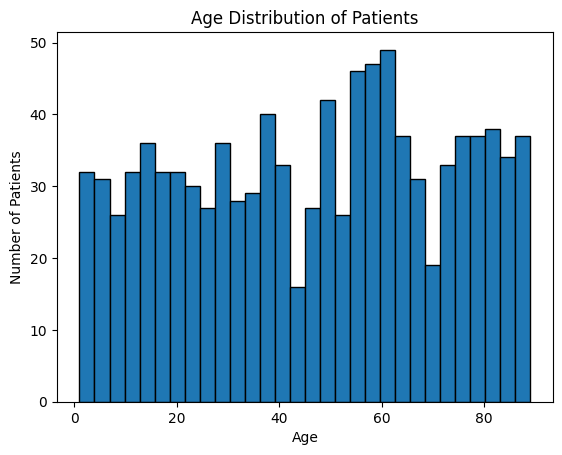

PART B, DOCTORS


,doctor_id,doctor_name,department,years_experience
0,1,Dr. Allen,Dermatology,15
1,2,Dr. Clark,Cardiology,5
2,3,Dr. Walker,Dermatology,29


Unique Departments:
Department: Dermatology
Department: Cardiology
Department: Oncology
Department: Neurology
Department: General Medicine
Department: Pediatrics
Department: Orthopedics
--------------------
Years of experience distribution among doctors: 



count    80.000000
mean     18.737500
std       9.248666
min       1.000000
25%      12.750000
50%      19.000000
75%      26.000000
max      34.000000
Name: years_experience, dtype: float64

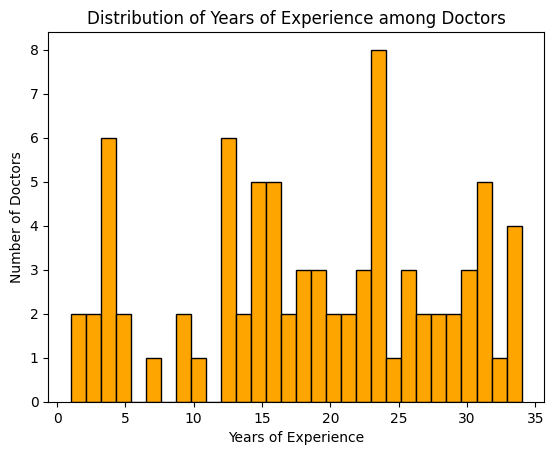

--------------------
Number of doctors per department:


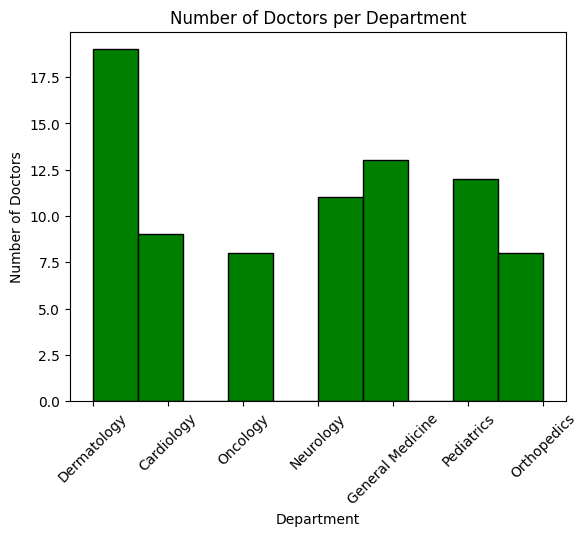

In [3]:
# PART A. Patients Dataset
display(patients_df.head(3))
pat_per_city = patients_df['city'].value_counts()


# PATIENTS PER CITY
for city, count in pat_per_city.items():
    print(f"City: {city}, Number of patients: {count}")


# DISPLAY AGE DISTRIBUTION

print ("---------"
       f"\nAge distribution of patients: \n Min: {patients_df['age'].min()}\n"
       f" Max: {patients_df['age'].max()}\n Mean: {patients_df['age'].mean()}\n"
       "--------------------"
)
       
# HISTOGRAM OF AGE DISTRIBUTION
plt.hist(patients_df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()




# PART B. Doctors Dataset
print("PART B, DOCTORS")
display(doctors_df.head(3))

# unique departments
unique_departments = doctors_df['department'].unique()
print('Unique Departments:')
for d in unique_departments:
    print (f"Department: {d}")
print ("--------------------")
# YOE distribution:


print ("Years of experience distribution among doctors: \n")

display(doctors_df['years_experience'].describe())



plt.hist(doctors_df['years_experience'], bins=30, edgecolor='black', color='orange')
plt.title('Distribution of Years of Experience among Doctors')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Doctors')
plt.show()

# Number of doctors per department
print ("--------------------")
print("Number of doctors per department:")

doctors_df['department'].value_counts()

plt.hist(doctors_df['department'], edgecolor='black', color='green')
plt.title('Number of Doctors per Department')
plt.xlabel('Department')
plt.ylabel('Number of Doctors')
plt.xticks(rotation=45)
plt.show()


# QUESTION 2 Continued

Parts C D and E


In [4]:
# PART C. Visits Dataset
print("PART C, VISITS")
display(visits_df.head(3))

# List unique complaints
unique_complaints = visits_df['complaint'].unique()
print('Unique Complaints:\n')
for complaint in unique_complaints:
    print(f"Complaint: {complaint}")

print ("--------------------")

# VISITS PER COMPLAINT CATEOGORY
visits_per_complaint = visits_df['complaint'].value_counts()
print("Number of visits per complaint category:\n")
for complaint, count in visits_per_complaint.items():
    print(f"{complaint}, Number of visits: {count}")


# PART D. Treatments Dataset
print("PART D, TREATMENTS")
display(treatments_df.head(3))


# List all treatment types and their cost
print ("--------------------")  
treatments_cost = treatments_df[['treatment_name', 'cost']].drop_duplicates()

for index, row in treatments_cost.iterrows():
    print (f'Treatment: {row['treatment_name']}, cost: ${row['cost']}')

print('------------------')

# PART E: billing dataset
print('Part E: Billings')
display(billing_df.head(3))

print('------------------')
print('Total amount, summary stats\n')
display(billing_df['total_amount'].describe())
print('------------------')
print('Insurance covered, summary stats\n')
display(billing_df['insurance_covered'].describe())
print('------------------')
print('Patient Paid, summary stats\n')
display(billing_df['patient_paid'].describe())



PART C, VISITS


,visit_id,patient_id,doctor_id,visit_date,complaint
0,1,426,44,2023-07-26,Back Pain
1,2,681,7,2023-04-17,Back Pain
2,3,996,44,2023-05-26,Allergy


Unique Complaints:

Complaint: Back Pain
Complaint: Allergy
Complaint: Headache
Complaint: Fatigue
Complaint: Cough
Complaint: Check-up
Complaint: Dizziness
Complaint: Fever
Complaint: Chest Pain
Complaint: Injury
--------------------
Number of visits per complaint category:

Fatigue, Number of visits: 211
Back Pain, Number of visits: 210
Cough, Number of visits: 209
Allergy, Number of visits: 206
Fever, Number of visits: 203
Check-up, Number of visits: 202
Dizziness, Number of visits: 199
Injury, Number of visits: 197
Headache, Number of visits: 189
Chest Pain, Number of visits: 174
PART D, TREATMENTS


,treatment_id,visit_id,treatment_name,cost
0,1,1,CT Scan,700
1,2,1,ECG,120
2,3,1,Ultrasound,300


--------------------
Treatment: CT Scan, cost: $700
Treatment: ECG, cost: $120
Treatment: Ultrasound, cost: $300
Treatment: MRI, cost: $600
Treatment: Vaccination, cost: $50
Treatment: X-Ray, cost: $150
Treatment: Blood Test, cost: $80
Treatment: Physical Therapy, cost: $100
------------------
Part E: Billings


,bill_id,visit_id,total_amount,insurance_covered,patient_paid
0,1,1,1120,704.718489,415.281511
1,2,2,600,396.887483,203.112517
2,3,3,900,467.915252,432.084748


------------------
Total amount, summary stats



count    2000.000000
mean      514.920000
std       393.308199
min        50.000000
25%       170.000000
50%       400.000000
75%       780.000000
max      2000.000000
Name: total_amount, dtype: float64

------------------
Insurance covered, summary stats



count    2000.000000
mean      333.257683
std       265.494415
min        20.028216
25%       112.135863
50%       261.555611
75%       495.684545
max      1558.076397
Name: insurance_covered, dtype: float64

------------------
Patient Paid, summary stats



count    2000.000000
mean      181.662317
std       171.603238
min         5.297834
25%        53.490288
50%       123.618968
75%       268.192048
max      1182.851846
Name: patient_paid, dtype: float64

# Question 3

Use the functionality available in pandas that you have seen in Lab 3 to answer
the following questions:

1. Which city has the most registered patients?
2. Which treatment is most common?
3. What is the average treatment cost?
4. What is the youngest and oldest patient age?
5. How many doctors have more than 10 years of experience?
6. Which complaint appears most frequently across visits?


In [5]:
# 1)  # MOST PATIENTS
print('Question:')
city_counts = patients_df.groupby('city').agg(patient_count=('patient_id', 'count')).sort_values(by='patient_count', ascending=False)
city_most_patients = city_counts.index[0]
city_most_patients_count = city_counts.iloc[0]['patient_count']

print(f"1. City with most patients: {city_most_patients} with {city_most_patients_count} patients")

# 2) Most common treatment

treatment_counts = treatments_df.groupby('treatment_name').agg(treatment_count=('visit_id', 'count')).sort_values(by='treatment_count', ascending=False)

most_common_treatment = treatment_counts.index[0]
most_common_treatment_count = treatment_counts.iloc[0]['treatment_count']
print(f"2. Most common treatment: {most_common_treatment}, {most_common_treatment_count} times")

# 3) Average treatment cost:

avg_t_cost = treatments_df['cost'].agg('mean')
print(f"3. Average treatment cost: ${avg_t_cost:.1f}")


# 4) Youngest and oldest patients

print(f"4. Youngest patient: {patients_df['age'].agg('min')} y/o, Oldest patient: {patients_df['age'].agg('max')} y/o")

# 5) N doctors with +10 YOE

ten_plus_docs = doctors_df[doctors_df['years_experience'] > 10]
print(f"5. Doctors with +10 YOE: {ten_plus_docs.shape[0]}")

# 6) Most frequent complaint across visits

complaint_counts = visits_df.groupby('complaint').agg(visit_count=('visit_id', 'count')).sort_values(by='visit_count', ascending=False)

most_frequent_complaint = complaint_counts.index[0]
most_frequent_complaint_count = complaint_counts.iloc[0]['visit_count']
print(f"6. Most frequent complaint: {most_frequent_complaint}, {most_frequent_complaint_count} visits")

Question:
1. City with most patients: Seattle with 159 patients
2. Most common treatment: Ultrasound, 548 times
3. Average treatment cost: $259.9
4. Youngest patient: 1 y/o, Oldest patient: 89 y/o
5. Doctors with +10 YOE: 64
6. Most frequent complaint: Fatigue, 211 visits


# Question 4

#### To get a better idea of hospital analytics and obtain Key Performance Indicators, we need to understand visits fully by connecting patients, doctors, and billing.


1)  Join patients with visits: see who came and when by creating a dataset
called patients_visits containing patient_id, name, city, visit_date,
complaint [5 marks.]

2)  Join visits with doctors: see which doctor handled which visit by creating
a dataset called visits_doctors containing visit_id, doctor_name,
department, visit_date, complaint [5 marks.]

3) Build a full “visit log”, by join patients + visits + doctors + billing datasets,
name the new one visit_log containing the following columns:
    - patient name
    - patient city
    - doctor name
    - department
    - visit date
    - total bill & patient paid

In [6]:
# Question 4

display(patients_df.head(1), visits_df.head(1), doctors_df.head(1), billing_df.head(1))


# 1) Patient - Vist join
patients_visits = pd.merge(patients_df, visits_df, on='patient_id', how = 'inner')
patients_visits = patients_visits [['patient_id', 'name', 'city', 'visit_date', 'complaint']]
print('\nPatient-Visits DF:')
display(patients_visits.head(3))

# 2) Visits-Doctors join
visits_doctors = pd.merge(visits_df, doctors_df, on= 'doctor_id', how= 'inner' )
visits_doctors = visits_doctors[['visit_id','doctor_name','department','visit_date','complaint']]
print('\nVisits-Doctors DF:')
display(visits_doctors.head(3))

# 3) Full visit log
## ** Since we did not include doctor id on the patients-visit merge, I am going to do the visit log from scratch:

visit_log = pd.merge(patients_df, visits_df, on='patient_id', how='inner')
visit_log = pd.merge (visit_log, doctors_df, on = 'doctor_id', how = 'inner')
visit_log = pd.merge (visit_log, billing_df, on= 'visit_id', how = 'inner')
visit_log = visit_log[['name', 'city' , 'doctor_name', 'department', 'visit_date', 'total_amount', 'patient_paid', 'patient_id']]
visit_log.rename(columns={
                          'name' : 'patient name',
                          'city': 'patient city', 
                          'doctor_name': 'doctor name',
                          'visit_date': 'visit date',
                          'total_amount': 'total bill',
                          'patient_paid' : 'patient paid'
                          }, inplace=True)


display(visit_log.head(3))

,patient_id,name,age,city,registration_date
0,1,Nate,48,Chicago,20/06/2022


,visit_id,patient_id,doctor_id,visit_date,complaint
0,1,426,44,2023-07-26,Back Pain


,doctor_id,doctor_name,department,years_experience
0,1,Dr. Allen,Dermatology,15


,bill_id,visit_id,total_amount,insurance_covered,patient_paid
0,1,1,1120,704.718489,415.281511



Patient-Visits DF:


,patient_id,name,city,visit_date,complaint
0,1,Nate,Chicago,2023-05-23,Fever
1,2,Diana,New York,2023-06-17,Fever
2,2,Diana,New York,2023-04-03,Dizziness



Visits-Doctors DF:


,visit_id,doctor_name,department,visit_date,complaint
0,1,Dr. King,Pediatrics,2023-07-26,Back Pain
1,2,Dr. Allen,Neurology,2023-04-17,Back Pain
2,3,Dr. King,Pediatrics,2023-05-26,Allergy


,patient name,patient city,doctor name,department,visit date,total bill,patient paid,patient_id
0,Nate,Chicago,Dr. Davis,Neurology,2023-05-23,1400,708.296156,1
1,Diana,New York,Dr. Davis,Dermatology,2023-06-17,830,379.481113,2
2,Diana,New York,Dr. Brown,Oncology,2023-04-03,300,110.000868,2


# Question 5

Now that data is joined, compute the following KPIs:  

a) Total number of visits per department  

b) Total revenue per department based on totalamountvariable.  

c) Average spend per patient  

d) Top 5 doctors by number of patients visited.  


In [7]:
# Q5 
print('Question 5:')

# a) total n of visits per department

v_per_department= visit_log.groupby('department').agg(total_visits=('visit date', 'count'))
print(' 1. Total Visits per Department:')
print(v_per_department.sort_values(by='total_visits', ascending=False))


# b) revenue by dept based on total amount

r_per_department = visit_log.groupby('department').agg(total_revenue=('total bill', 'sum')).sort_values(by='total_revenue', ascending=False)
print('\n\n2. Total Revenue per Department:')
print(r_per_department)


# C) avg spend per patient 

# Had to go back to include patient_id on visit_log, name is not unique

s_per_patient = visit_log.groupby('patient_id').agg(total_spend=('total bill', 'sum'))
avg_s_per_patient = s_per_patient['total_spend'].mean()

print(f'\n\n3. Average Spend per Patient')
print(f'${avg_s_per_patient:.1f}')


# D) top 5 docs per n visits

v_per_doctor = visit_log.groupby('doctor name').agg(patient_visits=('patient_id', 'count')).sort_values(by='patient_visits', ascending=False)

print('\n\n4. Top 5 Docs by visits')
print(v_per_doctor.head(5))

Question 5:
 1. Total Visits per Department:
                  total_visits
department                    
Dermatology                461
General Medicine           342
Pediatrics                 310
Neurology                  267
Cardiology                 237
Orthopedics                194
Oncology                   189


2. Total Revenue per Department:
                  total_revenue
department                     
Dermatology              239860
General Medicine         172130
Pediatrics               157550
Neurology                144150
Cardiology               116590
Oncology                 104640
Orthopedics               94920


3. Average Spend per Patient
$1200.3


4. Top 5 Docs by visits
             patient_visits
doctor name                
Dr. Clark               191
Dr. Thomas              179
Dr. Brown               173
Dr. Davis               171
Dr. Taylor              167


# Question 6

Rank doctors inside each department by visit volume and output the top 5 per
department


In [8]:
top_docs = visit_log.groupby(['department', 'doctor name']).agg(visit_volume = ('visit date', 'count')).sort_values(by= ['department', 'visit_volume'], ascending = [True, False])
# Ascending then Descending confused me a bit, but it was to first group by department, then 'rank' by visit volume

print ('Top 5 Docs per visit volume, per department')
top_docs.groupby('department').head(5)

Top 5 Docs per visit volume, per department


visit_volume
department       doctor name               
Cardiology       Dr. Clark               62
                 Dr. Thomas              54
                 Dr. Taylor              48
                 Dr. Brown               29
                 Dr. Robinson            26
Dermatology      Dr. Allen               67
                 Dr. Taylor              59
                 Dr. Lee                 58
                 Dr. Walker              55
                 Dr. King                52
General Medicine Dr. Thomas              82
                 Dr. Allen               56
                 Dr. Harris              33
                 Dr. Johnson             27
                 Dr. Young               26
Neurology        Dr. Davis              120
                 Dr. Taylor              36
                 Dr. Brown               25
                 Dr. Thomas              24
                 Dr. King                21
Oncology         Dr. Clark               47
                 Dr. Wilson              33
                 Dr. Davis               26
                 Dr. Brown               22
                 Dr. King                21
Orthopedics      Dr. Brown               52
                 Dr. White               47
                 Dr. Harris              28
                 Dr. Clark               25
                 Dr. Robinson            23
Pediatrics       Dr. Smith               58
                 Dr. King                51
                 Dr. Clark               32
                 Dr. White               30
                 Dr. Lee                 26

# Question 7

Compute time between visits per patient and show the top 10 longest times.
Hint: Sort visits by patient_id and visit_date.



In [9]:
visit_log.head(2)

visit_log['visit date'] = pd.to_datetime(visit_log['visit date'])

visits_sorted= visit_log.sort_values(by=['patient_id', 'visit date']) ## Ascending both, so we have the earliest visits as the first observations.
visits_sorted['since_last_visit'] = visits_sorted.groupby('patient_id')['visit date'].diff()  # calculate time delta
t10_times = visits_sorted.sort_values(by = 'since_last_visit', ascending = False)

print('Top 10 Longest Times Between Visits:')
display(t10_times[['patient name', 'patient_id', 'since_last_visit']].head(10))

Top 10 Longest Times Between Visits:


,patient name,patient_id,since_last_visit
1007,Emily,506,361 days
1201,Mona,604,334 days
1016,Olivia,513,333 days
1965,Henry,985,330 days
181,Karen,82,317 days
1769,Karen,873,314 days
1842,Bob,914,313 days
775,Olivia,395,312 days
1855,Gina,920,310 days
958,Tina,483,310 days


# Question 8

Q7 Which department is most profitable?
(Provide the name of department as well as the code that allowed you to find
the answer)


# Question 9

Do older patients (60+) visit more frequently?

(Provide a yes/no as well as the code that allowed you to find the answer)

In [10]:
# lambda function to map to groups

patients_df['age_group'] = patients_df['age'].apply(lambda x: 'Old' if x > 60 else 'Young')
# counting patients per group
patients_per_age_group = patients_df['age_group'].value_counts()
print("Patients per age group:")
print(patients_per_age_group)

# merge 
merged = pd.merge(patients_df, visits_df, on = 'patient_id', how = 'inner')
merged = merged[['patient_id', 'age_group', 'visit_id']]

# Total number of visits per group

print ('------------------------')
visit_count= merged['age_group'].value_counts()
print('visits per age group:\n', visit_count)



## dividing gives the avg visits per age group (aka answer)
print ('\n\n\n ------------------------------------------')
print ('\nAverage visits per age group: \n')
print (visit_count / patients_per_age_group)


print('ANSWER: NO, YOUNGER PEOPLE VISIT SLIGHTLY MORE ON AVG')



Patients per age group:
age_group
Young    660
Old      340
Name: count, dtype: int64
------------------------
visits per age group:
 age_group
Young    1330
Old       670
Name: count, dtype: int64



 ------------------------------------------

Average visits per age group: 

age_group
Young    2.015152
Old      1.970588
Name: count, dtype: float64
ANSWER: NO, YOUNGER PEOPLE VISIT SLIGHTLY MORE ON AVG
